# Project: Titanic

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("./train.csv")
test_df  = pd.read_csv("./test.csv")

In [3]:
test_df.columns
train_df.set_index(train_df.PassengerId, inplace=True)
train_df.drop('PassengerId', axis=1, inplace=True)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df = pd.read_csv("./test.csv", index_col="PassengerId")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [5]:
train_df["Survived"] = train_df["Survived"].astype("category")
# train_df["Survived"].dtype
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 77.6+ KB


In [6]:
features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
def convert_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype("category")
convert_cat(train_df, features)
convert_cat(test_df, features)
train_df.describe(include=['category'])
# train_df.describe()

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


# Exploratory Data Analysis(EDA)

In [7]:
train_df["Survived"].value_counts().to_frame()
train_df["Survived"].value_counts(normalize=True).to_frame()

,proportion
Survived,
0,0.616162
1,0.383838


In [8]:
train_df["Sex"].value_counts().to_frame()
train_df["Sex"].value_counts(normalize=True).to_frame()

,proportion
Sex,
male,0.647587
female,0.352413


<Axes: xlabel='Sex', ylabel='count'>

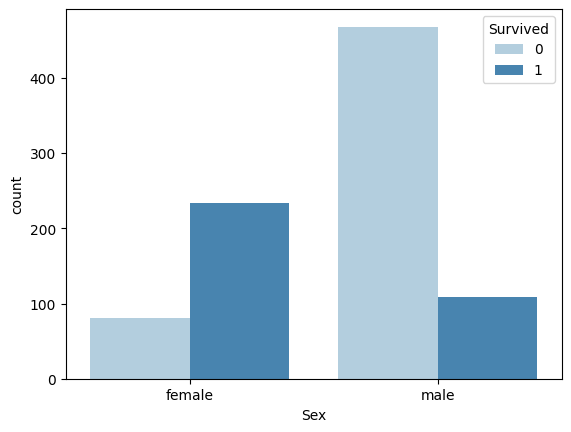

In [9]:
sns.countplot(data=train_df, x='Sex', hue='Survived', palette='Blues')

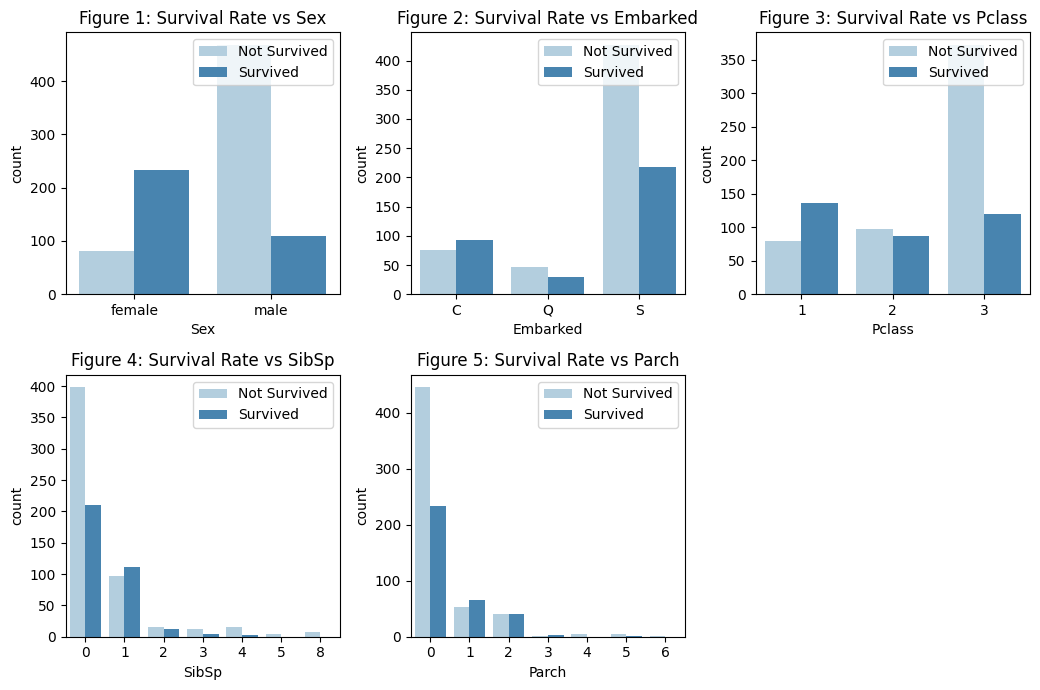

In [10]:
cols = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']

n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize = (n_cols*3.5, n_rows*3.5))
for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c # Index cols
        if i < len(cols):
            ax_i = ax[r,c]
            sns.countplot(data = train_df, x = cols[i], hue = 'Survived', palette='Blues', ax = ax_i)
            ax_i.set_title(f"Figure {i+1}: Survival Rate vs {cols[i]}")
            ax_i.legend(title='', loc='upper right', labels=['Not Survived', 'Survived'])

ax.flat[-1].set_visible(False)
plt.tight_layout()
plt.show()

<Axes: xlabel='Fare', ylabel='Count'>

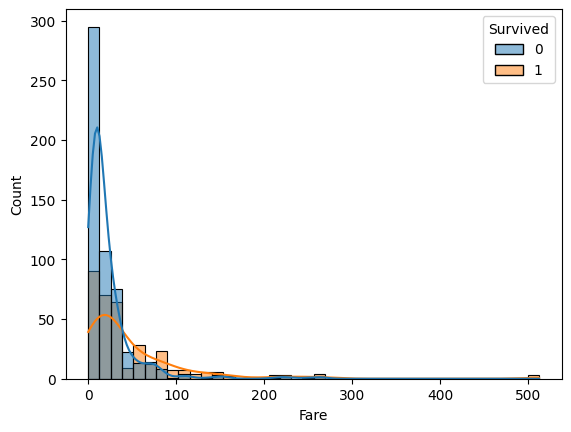

In [11]:
# EDA for Numberical Featuresr

# AGE
# sns.histplot(data=train_df, x='Age', bins = 40, hue = 'Survived', kde=True)

# FARE
# train_df["Fare"].describe()
sns.histplot(data=train_df, x='Fare', bins = 40, hue = 'Survived', kde=True)

<Axes: xlabel='Fare', ylabel='count'>

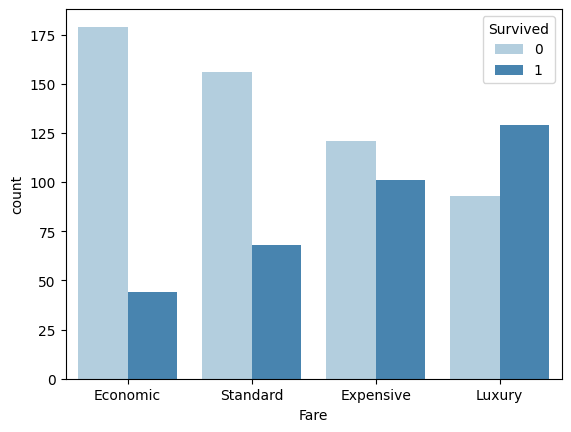

In [12]:
fare_categories = ['Economic', 'Standard', 'Expensive','Luxury']
quartitle_data = pd.qcut(train_df['Fare'], 4, labels=fare_categories)

sns.countplot(x = quartitle_data, hue= train_df['Survived'], palette='Blues')

# Feature Engineering & Data Wrangling

In [35]:
# train_df['Name'].tail(10)
import re #regular expression
def extract_title(name):
    p = re.compile(r",([\w\s]+)\.")
    return p.search(name).groups(1)[0].strip()

train_df['Title'] = train_df['Name'].apply(lambda name: extract_title(name))
test_df['Title'] = test_df['Name'].apply(lambda name: extract_title(name))

    # p = re.compile(r",([\w\s]+)\.")
test_df['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [40]:
def group_title(title):
    if title in ['Mr', 'Mrs', 'Miss', 'Master']:
        return title
    elif title == "Ms":
        return "Miss"
    else:
        return "Others"
    
train_df['Title'] = train_df['Title'].apply(lambda title: group_title(title)) 
test_df['Title'] = test_df['Title'].apply(lambda title: group_title(title)) 
# test_df['Title'] = test_df['Title'].apply(lambda title: group_title(title)) 

<Axes: xlabel='Title', ylabel='count'>

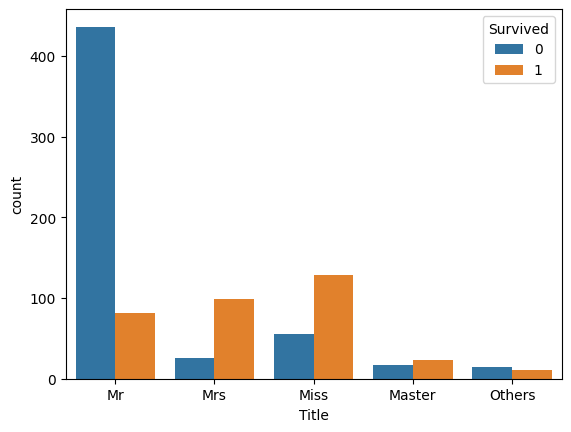

In [15]:
# test_df['Title'] = test_df['Title'].apply(lambda title: group_title(title)) 

sns.countplot(data=train_df, x='Title', hue='Survived')

<Axes: xlabel='Family_Cat', ylabel='count'>

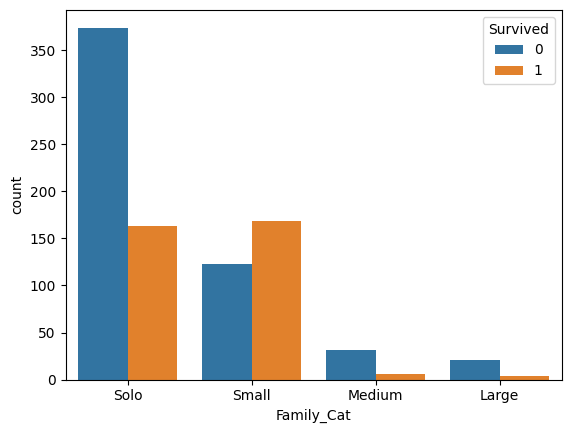

In [43]:
#Family size
train_df['Family_Size'] = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int') + 1
test_df['Family_Size'] = test_df['SibSp'].astype('int') + test_df['Parch'].astype('int') + 1
train_df['Family_Cat']=pd.cut(train_df['Family_Size'], bins=[0,1,4,6,20], labels=['Solo', 'Small', 'Medium', 'Large'])
test_df['Family_Cat']=pd.cut(test_df['Family_Size'], bins=[0,1,4,6,20], labels=['Solo', 'Small', 'Medium', 'Large'])
sns.countplot(data=train_df, x='Family_Cat', hue='Survived')

In [ ]:
#DATA WRANGLING
num_features = ['Age', 'Fare']
cat_features = ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']
feature_cols = num_features + cat_features
print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']


In [20]:

def display_missing(df, feature_cols):
    n_rows = df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print(f"{col} has {missing_count*100/n_rows:.2f}% missing values.")
            
display_missing(train_df, feature_cols)
            

Age has 19.87% missing values.
Embarked has 0.22% missing values.


In [24]:
#Filling missing values
age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass'])['Age'].median()
age_by_sex_pclass

/tmp/ipykernel_52226/1840384383.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass'])['Age'].median()


Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [38]:
train_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
display_missing(train_df, feature_cols)


Age has 19.87% missing values.
Embarked has 0.22% missing values.


/tmp/ipykernel_52226/2353566097.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))


In [44]:
X = train_df[feature_cols]
y = train_df['Survived']
X_test = test_df[feature_cols]

In [75]:
# process pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])        

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])
X = train_df[feature_cols]
X_test = test_df[feature_cols]
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_Cat'])])

In [ ]:
X = preprocessor.transform(X)
X_test = preprocessor.transform(X_test)

In [76]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)